## Desafío - Pruebas de hipótesis
* Autor Walther Becks

### Evaluar juicios de hipótesis
A continuación se presenta una serie de enunciados de hipótesis. Usted debe discernir si es
posible rechazar la hipótesis nula.
* 75 individuos elegidos al azar fueron alcanzados por activistas pro-LGTB que se identificaron como homosexuales, y 75  alcanzados por activistas pro-LGTB que se identificaron como heterosexuales. El objetivo era medir actitudes frente a la adopción homoparentales. La organización encargada de procesar los datos obtuvo los siguientes resultados:
    * El 67% de los encuestados por heterosexuales se mostró a favor de la adopción homoparental, mientras que un 72% de  los encuestados por activistas que se identificaron como homosexuales se mostraron a favor de la adopción homoparental.
    * Asumiendo que la hipótesis nula es que ambos porcentajes no son diferentes, y la hipótesis alternativa es que existe una diferencia substancial entre ambos.
    * Con p-valor de 0.1183 ¿es posible rechazar la hipótesis nula en favor de la alternativa con una confianza de 95%?, ¿Cuanta es la confianza máxima con la que sería posible rechazar la hipótesis nula en favor de la alternativa con estos resultados?

In [2]:
print(f"No existe evidencia suficiente para rechazar la hipótesis nula con un IC de 95%\nLa confianza máxima para aceptar la hipótesis nula en favor de la alternativa es de un {(1-0.1183)*100}%\nDebido a que la muestra fue realizada por activistas, esta está cesgada y muestra fuertes dudas de la veracidad del estudio")

No existe evidencia suficiente para rechazar la hipótesis nula con un IC de 95%
La confianza máxima para aceptar la hipótesis nula en favor de la alternativa es de un 88.17%
Debido a que la muestra fue realizada por activistas, esta está cesgada y muestra fuertes dudas de la veracidad del estudio


## Importe la base de datos utilizada la sesión presencial anterior
* Agregue una serie de variables binarias por cada continente de la variable region.
    * Tip: Utilice np.where para ello.
* De manera similar a la sesión anterior, enfóquese en las siguientes variables:
     * Apellidos desde la A hasta la N: Enfocarse en las variables chldmort, adfert y life.
     * Apellidos desde la N hasta la Z: Enfocarse en las variables femlab, literacy y school.


In [73]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
plt.style.use('seaborn-whitegrid') # Gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (10, 7) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 200 # resolución gráficos

In [78]:
df = pd.read_csv('nations.csv',encoding='iso-8859-1')
df.drop(columns='Unnamed: 0',inplace=True)
variables = ['chldmort', 'adfert', 'life']
base = ['country','region']
df_becks = df[base+variables]
df_becks['Africa_bool'] = np.where(df_becks.loc[:,['region']]=='Africa',1,0)
df_becks['Asia_bool'] = np.where(df_becks.loc[:,['region']]=='Asia',1,0)
df_becks['Europe_bool'] = np.where(df_becks.loc[:,['region']]=='Europe',1,0)
df_becks['Americas_bool'] = np.where(df_becks.loc[:,['region']]=='Americas',1,0)
df_becks['Oceania_bool'] = np.where(df_becks.loc[:,['region']]=='Oceania',1,0)
df_becks.head()

C:\Users\Walther\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Walther\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Walther\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

,country,region,chldmort,adfert,life,Africa_bool,Asia_bool,Europe_bool,Americas_bool,Oceania_bool
0,Algeria,Africa,34.75,7.300000,72.316666,1,0,0,0,0
1,Benin,Africa,122.75,111.699997,54.733334,1,0,0,0,0
2,Botswana,Africa,60.25,52.099998,52.250000,1,0,0,0,0
3,Burkina Faso,Africa,170.50,124.800003,53.783333,1,0,0,0,0
4,Burundi,Africa,168.50,18.600000,48.866665,1,0,0,0,0


## Implemente una función de prueba de hipótesis a mano
* La función debe ingresar los siguientes argumentos:
    * df: La tabla de datos.
    * variable: La variable a analizar.
    * binarize: El indicador binario a utilizar.
* Tips:
    * Separe la variable en dos, utilizando el indicador binario. Recuerde eliminar los perdidos con dropna().
    * Implemente ttest_ind de scipy.stats y guarde el valor t y pval.
    * Reporte las medias para cada grupo (0 y 1).
    * Reporte la diferencia de entre las medias.
    * Reporte los valores t y p

In [104]:
def test_hip(df,var,binarize):
    a = df[df[binarize]==1][var].dropna()
    b = df[df[binarize]==0][var].dropna()
    
    t, pval = stats.ttest_ind(a,b)
    a_mean = a.mean()
    b_mean = b.mean()
    diff = a_mean - b_mean
    print("Media",var,"cuando",binarize,"is 1",round(a_mean,2))
    print("Media",var,"cuando",binarize,"is 0",round(b_mean,2))
    print("La diferencia de medias entre los dos grupos:",round(diff,2))
    print("P-value: ",round(pval,9),"()",round(t,3),")")
    return a_mean,b_mean

In [105]:
test_hip(df_becks,'life','Europe_bool')

Media life cuando Europe_bool is 1 76.95
Media life cuando Europe_bool is 0 66.39
La diferencia de medias entre los dos grupos: 10.56
P-value:  0.0 () 6.735 )


(76.94573619753815, 66.38951416520882)

## Implemente una función que grafique los histogramas para ambas muestras.
* Genere una función que devuelva un gráfico donde visualice los dos histogramas cuando la variable es 1 y 0, respectivamente.
    * Tips: Refactorize la función incluyendo el método hist de matplotlib.pyplot. Incluya los argumentos alpha y label.
* Para las tres variables de interés acorde a su grupo, analice las diferencias de medias por cada continente, y posteriormente grafique. Concluya con los principales resultados al respecto.

In [93]:
def test_hist(df,var,binarize):
    df[var].dropna()
    df[binarize].dropna()
    print(stats.ttest_ind(df.dropna()[df[binarize]==1][var],df.dropna()[df[binarize]== 0][var]))
    print(f"La media de {var} para la region {binarize} es:",df[df[binarize]==1][var].mean())
    print("La media para las otras regiones es:",df[df[binarize]==0][var].mean())

In [94]:
test_hist(df_becks,'life','Europe_bool')

Ttest_indResult(statistic=6.828978989179335, pvalue=1.1089926016720369e-10)
La media de life para la region Europe_bool es: 76.94573619753815
La media para las otras regiones es: 66.38951416520882


C:\Users\Walther\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\Walther\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [189]:
def grafico_hist(df,var,binarize):
    
    #def add_mean_line(df,var,binarize):

    
    g = sns.displot(df, x=var, hue=binarize,height=3,bins=30,facet_kws=dict(margin_titles=True))
    ax = plt.gca()
    ax.axvline(df[df[binarize]==1][var].mean(),color='orange',lw=3,ls='--')
    ax.text(df[df[binarize]==1][var].mean()/df[df[binarize]==1][var].count()/2, 0.7, f"mean_{var}={df[df[binarize]==1][var].mean():.0f} "
            ,transform=ax.transAxes,color='orange',fontweight='bold',fontsize=6)
    
    ax.axvline(df[df[binarize]==0][var].mean(),color='blue',lw=3,ls='--')
    ax.text(df[df[binarize]==0][var].mean()/df[df[binarize]==0][var].count()/2, 0.8, f"mean_{var}={df[df[binarize]==0][var].mean():.0f} "
            ,transform=ax.transAxes,color='blue',fontweight='bold',fontsize=6)

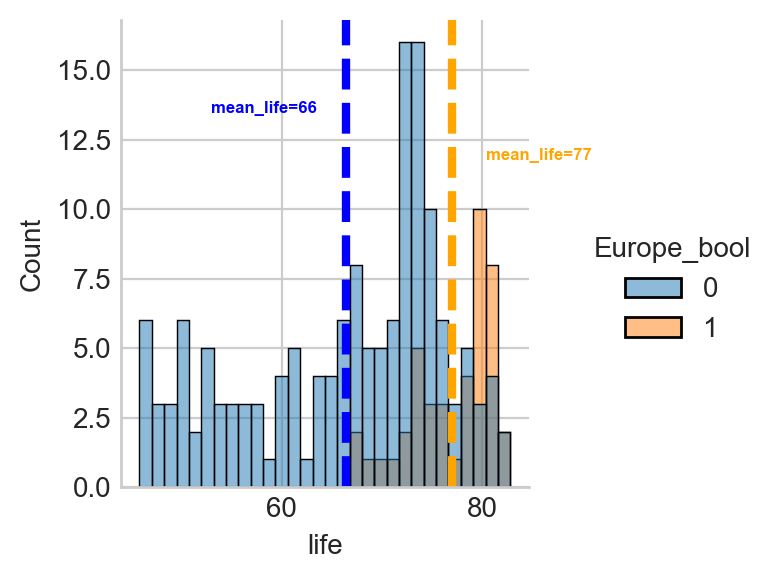

In [190]:
grafico_hist(df_becks,'life','Europe_bool')

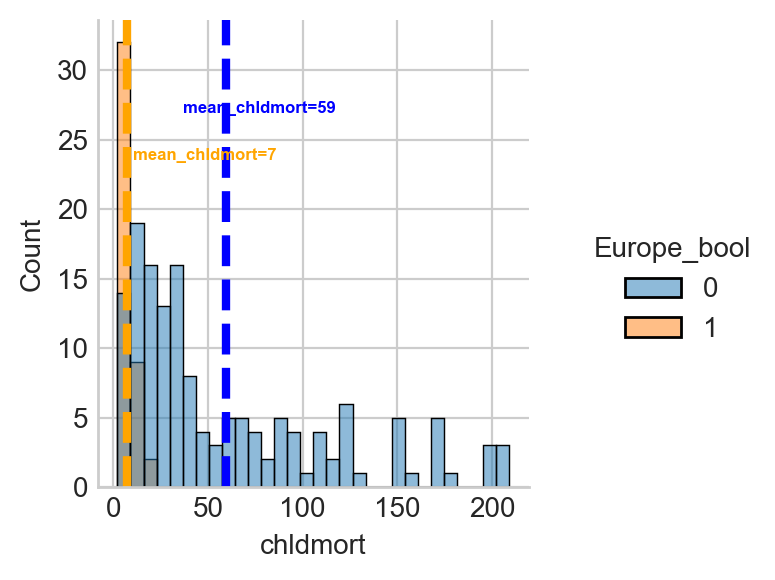

In [191]:
grafico_hist(df_becks,'chldmort','Europe_bool')

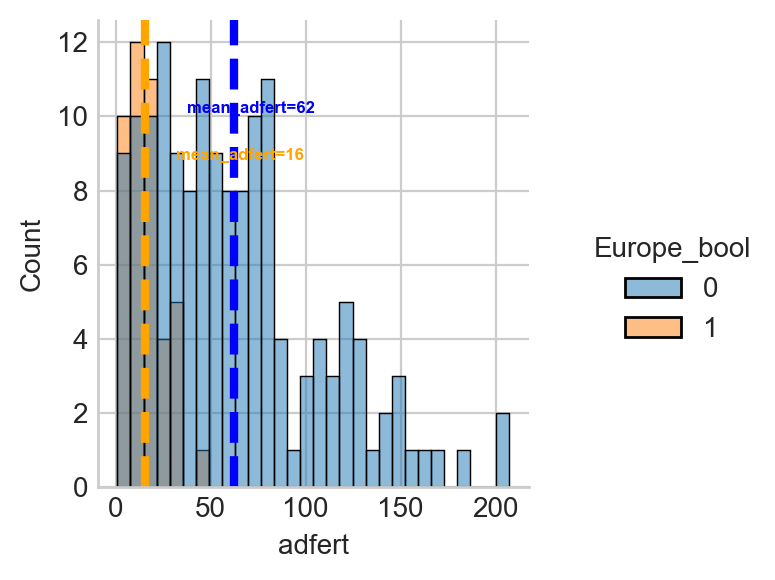

In [192]:
grafico_hist(df_becks,'adfert','Europe_bool')